In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Загрузка

In [2]:
data = pd.read_csv('test_data.csv')

In [3]:
description = pd.read_csv('description.csv')

## Описание данных

<b>Данные — небольшой датасет реальных данных, описывающих посещаемость небольшого кружка. Все данные анонимизированы и представлены в виде идентификаторов. 
Данные содержаться в гугл-таблице, 
- на вкладке data находятся собственно данные, 
- на вкладке description находится описание данных.<b>

In [4]:
description

,Поле,Описание
0,event_id,идентификатор урока
1,event_date,дата урока
2,customer_id,идентификатор ученика
3,is_attend,"1 — посетил, 0 — пропустил"
4,group_ids,идентификатор группы
5,teacher_ids,идентификатор преподавателя
6,attendance_id,идентификатор строки


In [5]:
data.shape

(320, 7)

In [6]:
data.head()

,event_id,event_date,customer_id,is_attend,group_ids,teacher_ids,attendance_id
0,5,2020-05-22,47,1,2,6,12
1,15,2020-06-03,354,1,5,4,57
2,34,2020-06-17,183,1,5,4,158
3,22,2020-06-11,12,1,1,3,95
4,36,2020-06-19,260,1,5,4,185


In [7]:
data.describe()

,event_id,customer_id,is_attend,group_ids,teacher_ids,attendance_id
count,320.000000,320.000000,320.000000,320.000000,320.000000,320.000000
mean,34.987500,281.806250,0.825000,3.131250,4.428125,166.218750
std,18.113708,194.831331,0.380562,1.591994,1.094797,96.801265
min,3.000000,12.000000,0.000000,1.000000,3.000000,1.000000
25%,19.000000,99.000000,1.000000,2.000000,4.000000,80.750000
50%,35.000000,258.000000,1.000000,3.000000,4.000000,170.500000
75%,51.250000,419.000000,1.000000,5.000000,5.000000,250.250000
max,67.000000,725.000000,1.000000,5.000000,7.000000,330.000000


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 320 entries, 0 to 319
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   event_id       320 non-null    int64 
 1   event_date     320 non-null    object
 2   customer_id    320 non-null    int64 
 3   is_attend      320 non-null    int64 
 4   group_ids      320 non-null    int64 
 5   teacher_ids    320 non-null    int64 
 6   attendance_id  320 non-null    int64 
dtypes: int64(6), object(1)
memory usage: 17.6+ KB


In [9]:
data.isnull().sum() 

event_id         0
event_date       0
customer_id      0
is_attend        0
group_ids        0
teacher_ids      0
attendance_id    0
dtype: int64

<b> Пропущенных значений нет <b>

## Преобразование

__Преобразование даты в datetime и день недели__

In [10]:
data['event_date'] = pd.to_datetime(data['event_date'])
# Создаём колонку день недели
data['week_day'] = data['event_date'].dt.day_name()       

## Визуализация

Text(0.5, 1.0, 'День недели')

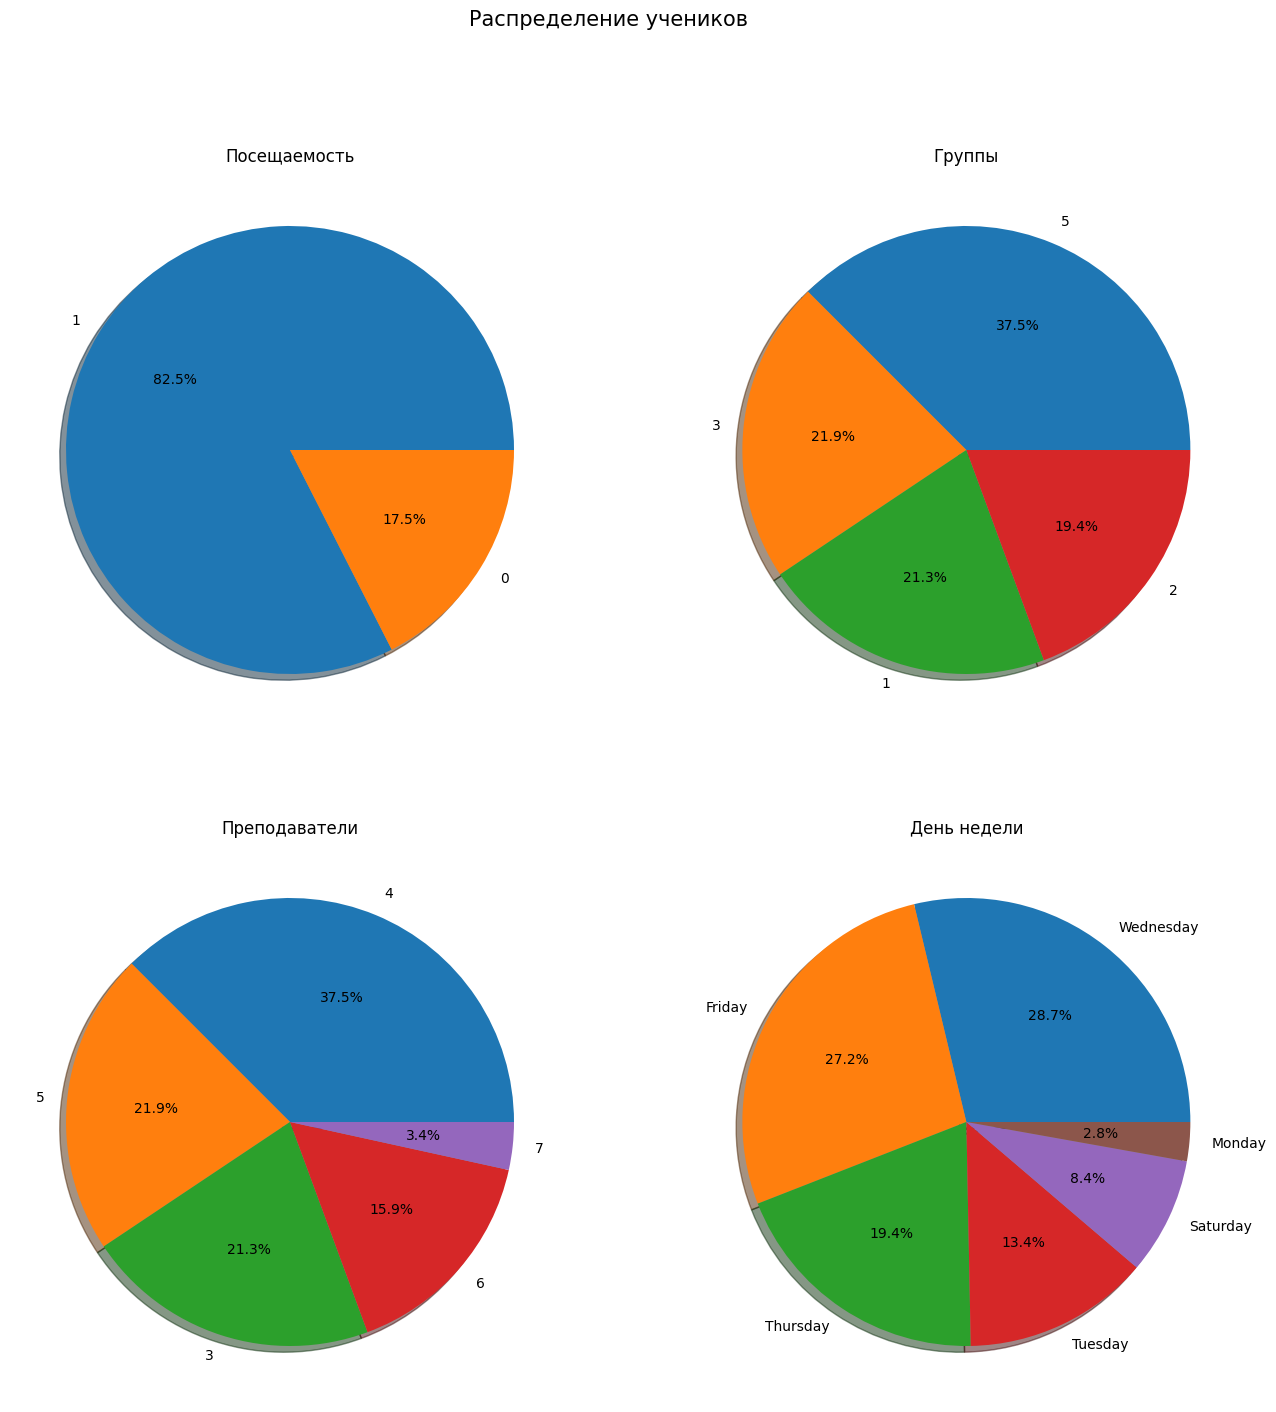

In [11]:
cat_cols = ['is_attend','group_ids','teacher_ids','week_day']
fig, axes = plt.subplots(2, 2, figsize=(16, 16))
ax = axes.ravel()
fig.suptitle('Распределение учеников', fontsize=15)
titles = ['Посещаемость','идентификатор группы','идентификатор преподавателя','день недели']
for i, cat in enumerate(cat_cols):
    x = data[cat].value_counts()
    index = x.index
    ax[i].pie(labels=index, x=x, shadow=True, autopct="%1.1f%%")   
ax[0].set_title('Посещаемость')
ax[1].set_title('Группы')
ax[2].set_title('Преподаватели')
ax[3].set_title('День недели')

### График распределения учеников по группам

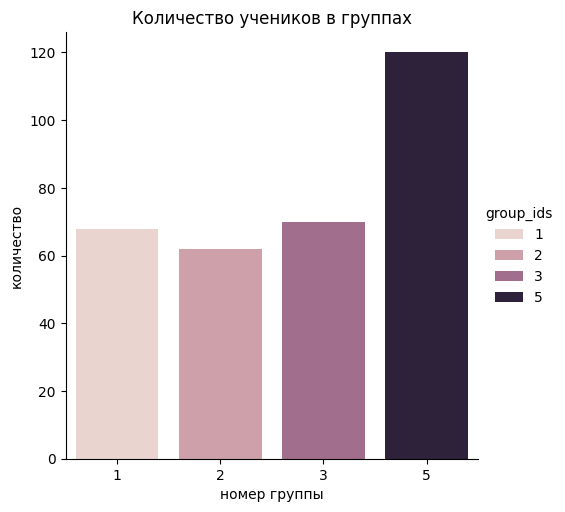

In [12]:
sns.catplot(data=data, x='group_ids',hue='group_ids', kind='count')
plt.title('Количество учеников в группах')
plt.xlabel('номер группы')
plt.ylabel('количество')
plt.show()

<u>__*Вывод:                                                                                                   
больше всего учеников в 5 группе (почти в 2 раза)*__</u>

### График распределения посещаемости учеников по дням

__Сортируем по увеличению даты__

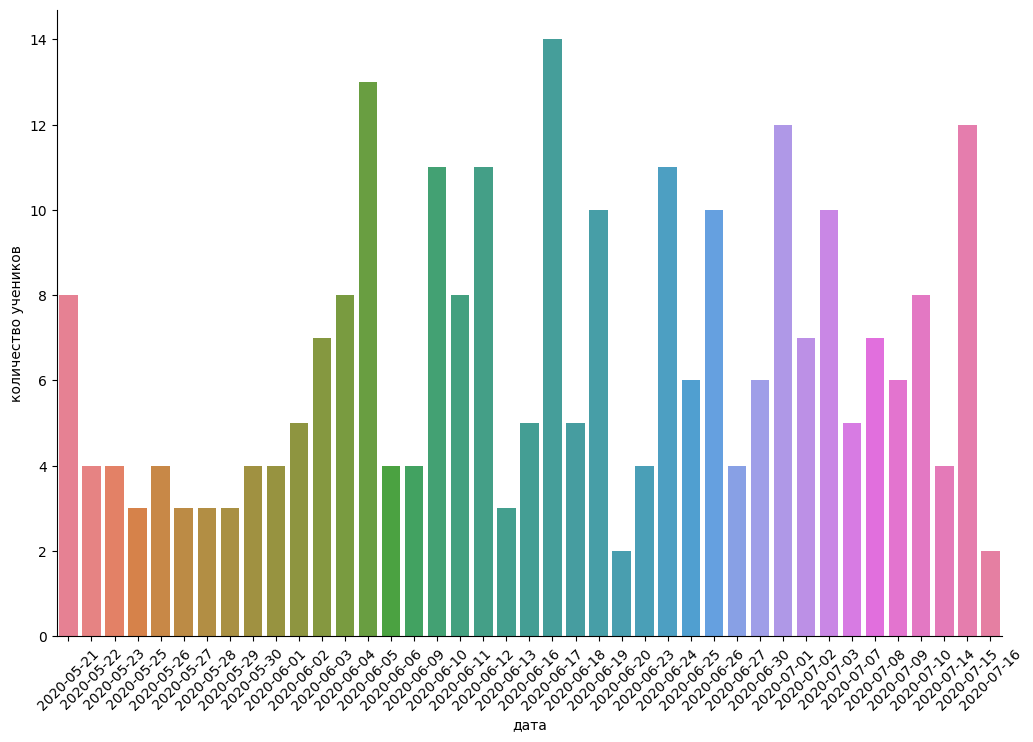

In [13]:
sns.catplot(data=data[data['is_attend'] == 1].sort_values('event_date'), x='event_date', hue='event_date', kind='count', height=7, aspect=1.5)
plt.ylabel('количество учеников')
plt.xlabel('дата')
plt.xticks(rotation=45)
plt.show()

### График распределения учеников по дням недели

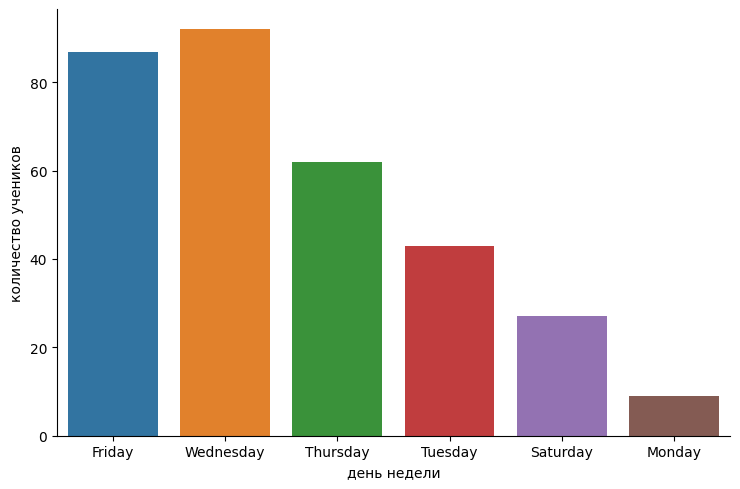

In [14]:
sns.catplot(data=data, x='week_day', hue='week_day', kind='count', height=5, aspect=1.5)
plt.xlabel('день недели')
plt.ylabel('количество учеников')
plt.show()

<u>__*Как видно из графика, в воскресенье кружок не работает. Более 80 учеников посещают кружки по пятницам и средам.*__</u>

### Распределение учеников по преподавателям

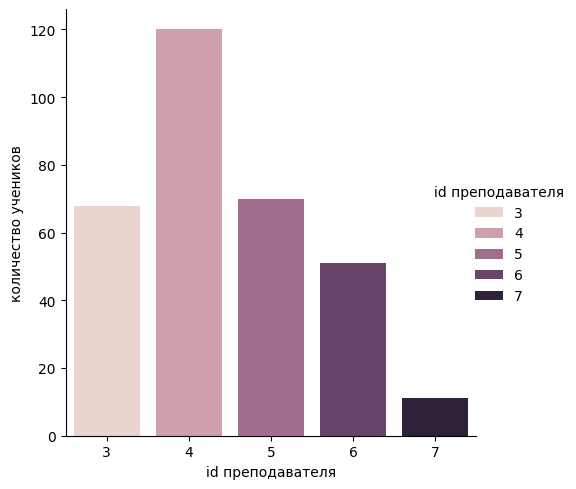

In [15]:
g = sns.catplot(data=data, x='teacher_ids', hue='teacher_ids', kind='count')
plt.xlabel('id преподавателя')
plt.ylabel('количество учеников')
g._legend.set_title('id преподавателя')
plt.show()

<u>__*Вывод:                                                                                  
больше всего учеников у преподавателя с id 4 и меньше всего у преподавателя с id 7*__</u>

### Общая посещаемость учеников

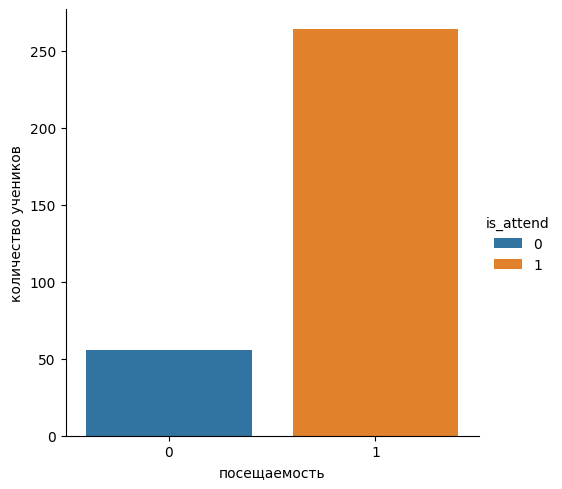

In [16]:
sns.catplot(data=data, x='is_attend', hue='is_attend', kind='count')
plt.xlabel('посещаемость')
plt.ylabel('количество учеников')
plt.show()

### Посещаемость учениками определённых уроков

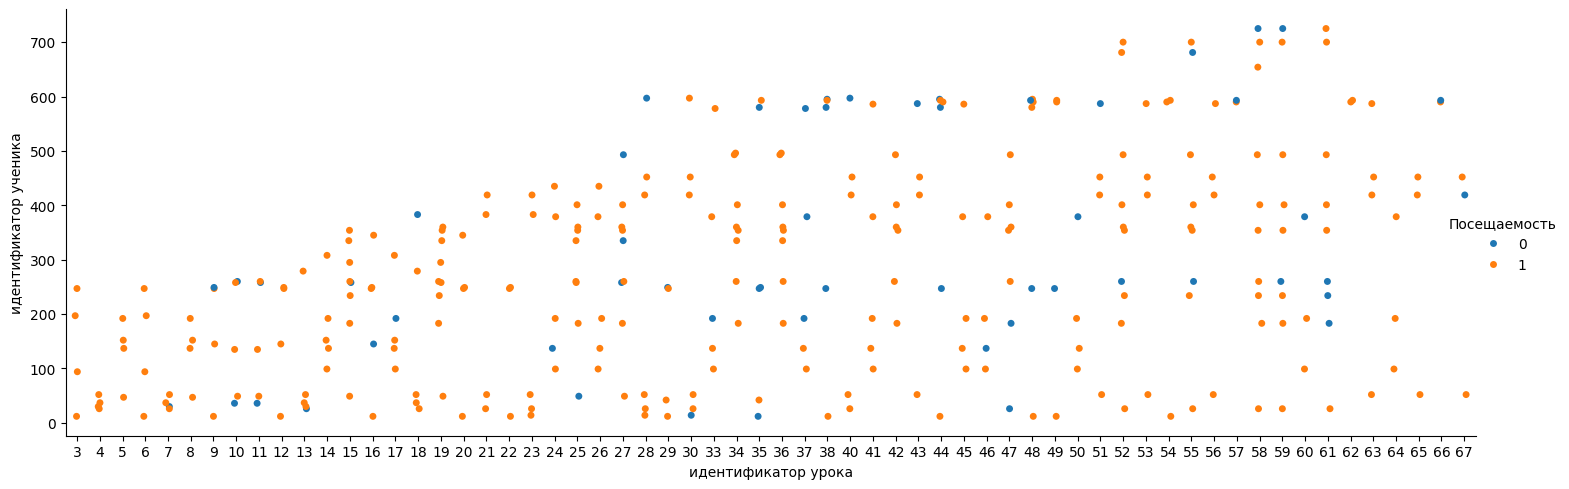

In [17]:
g = sns.catplot(data=data, y='customer_id',x='event_id', hue='is_attend', kind='strip', aspect=3)
plt.xlabel('идентификатор урока')
plt.ylabel('идентификатор ученика')
g._legend.set_title('Посещаемость')
plt.show()

<u>__*Вывод:                                                                    
ученики с идентификатором от 300 и выше не записаны на уроки с идентификатором от 3 до 13,                                                                         
ученики с идентификатором от 500 и выше не записаны на уроки с идентификатором от 3 до 26*__</u>

### Посещаемость учениками определённых уроков (по количеству учеников)

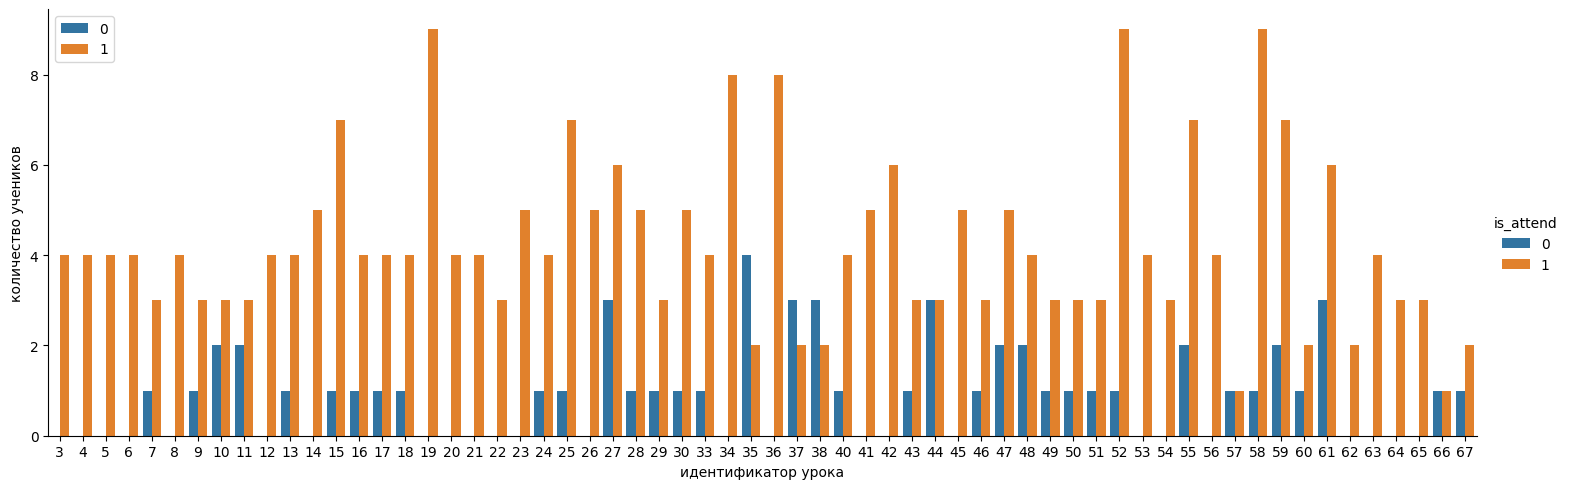

In [18]:
sns.catplot(data=data ,x='event_id', hue='is_attend', kind='count', aspect=3)
plt.xlabel('идентификатор урока')
plt.ylabel('количество учеников')
g._legend.set_title('Посещаемость')
plt.legend(loc="upper left")
plt.show()

### Посещаемость по отношению к преподавателям

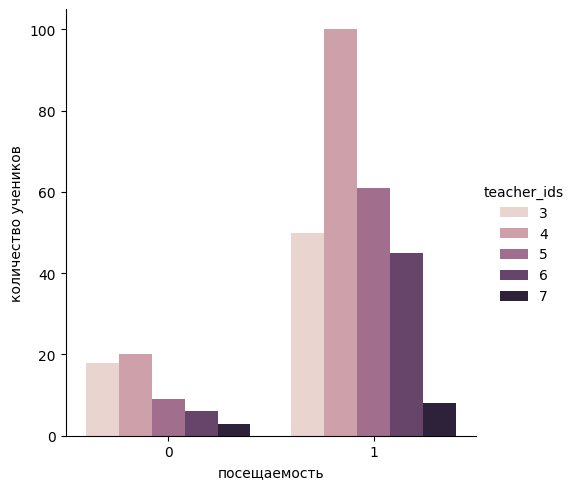

In [19]:
sns.catplot(data=data, x='is_attend', hue='teacher_ids', kind='count')
plt.xlabel('посещаемость')
plt.ylabel('количество учеников')
plt.show()

### Смотрим какие уроки посещают группы

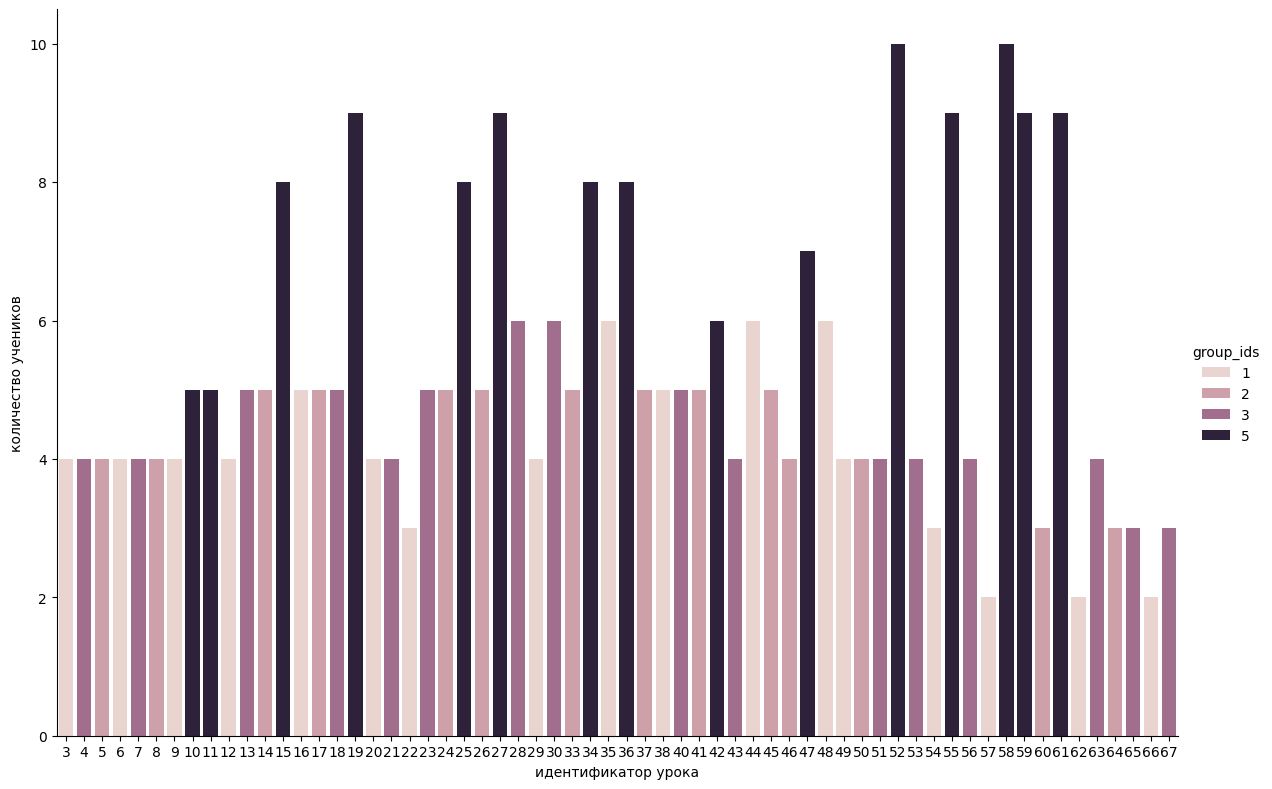

In [20]:
sns.catplot(data=data, x='event_id', hue='group_ids', kind='count', height=8, aspect=1.5)
plt.xlabel('идентификатор урока')
plt.ylabel('количество учеников')
plt.show()

### Смотрим какие уроки ведут преподаватели

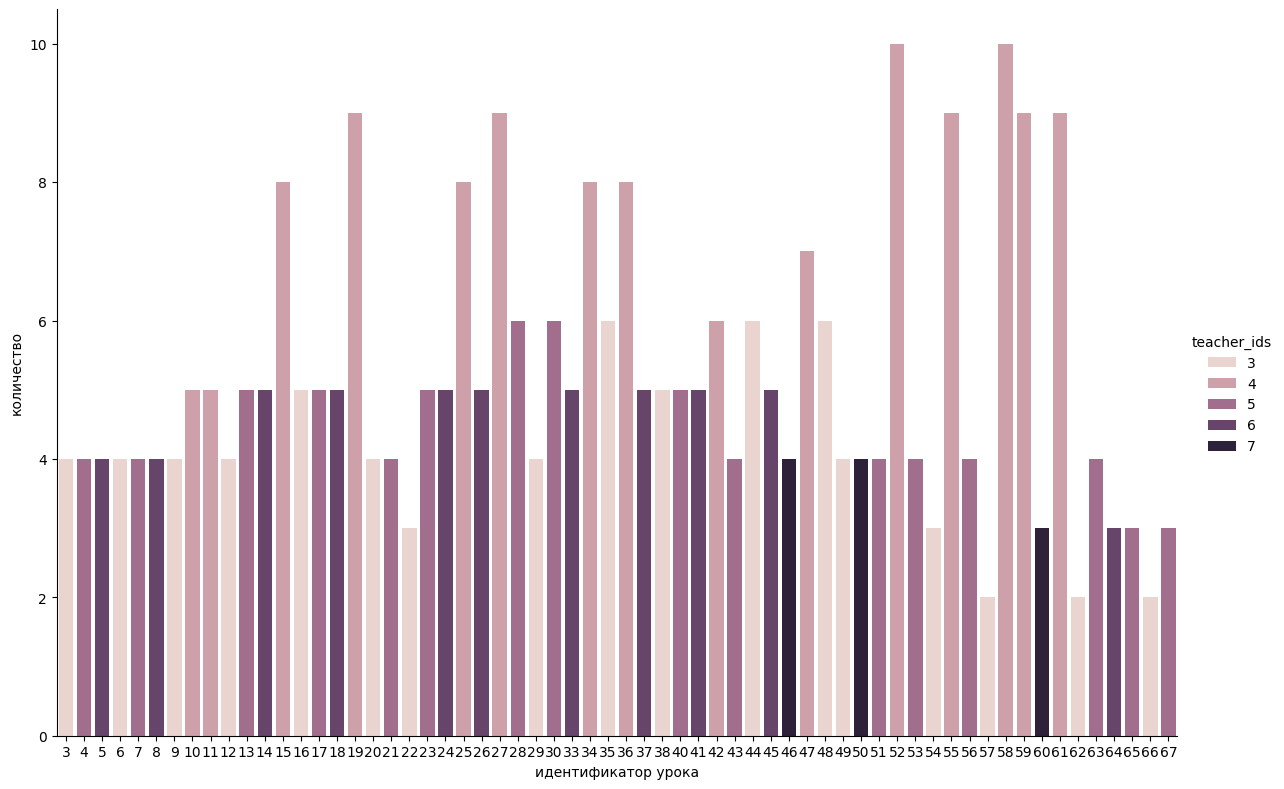

In [21]:
sns.catplot(data=data, x='event_id', hue='teacher_ids', kind='count', height=8, aspect=1.5)
plt.xlabel('идентификатор урока')
plt.ylabel('количество')
plt.show()

### Смотрим сколько уроков и в каком количестве ведут преподаватели

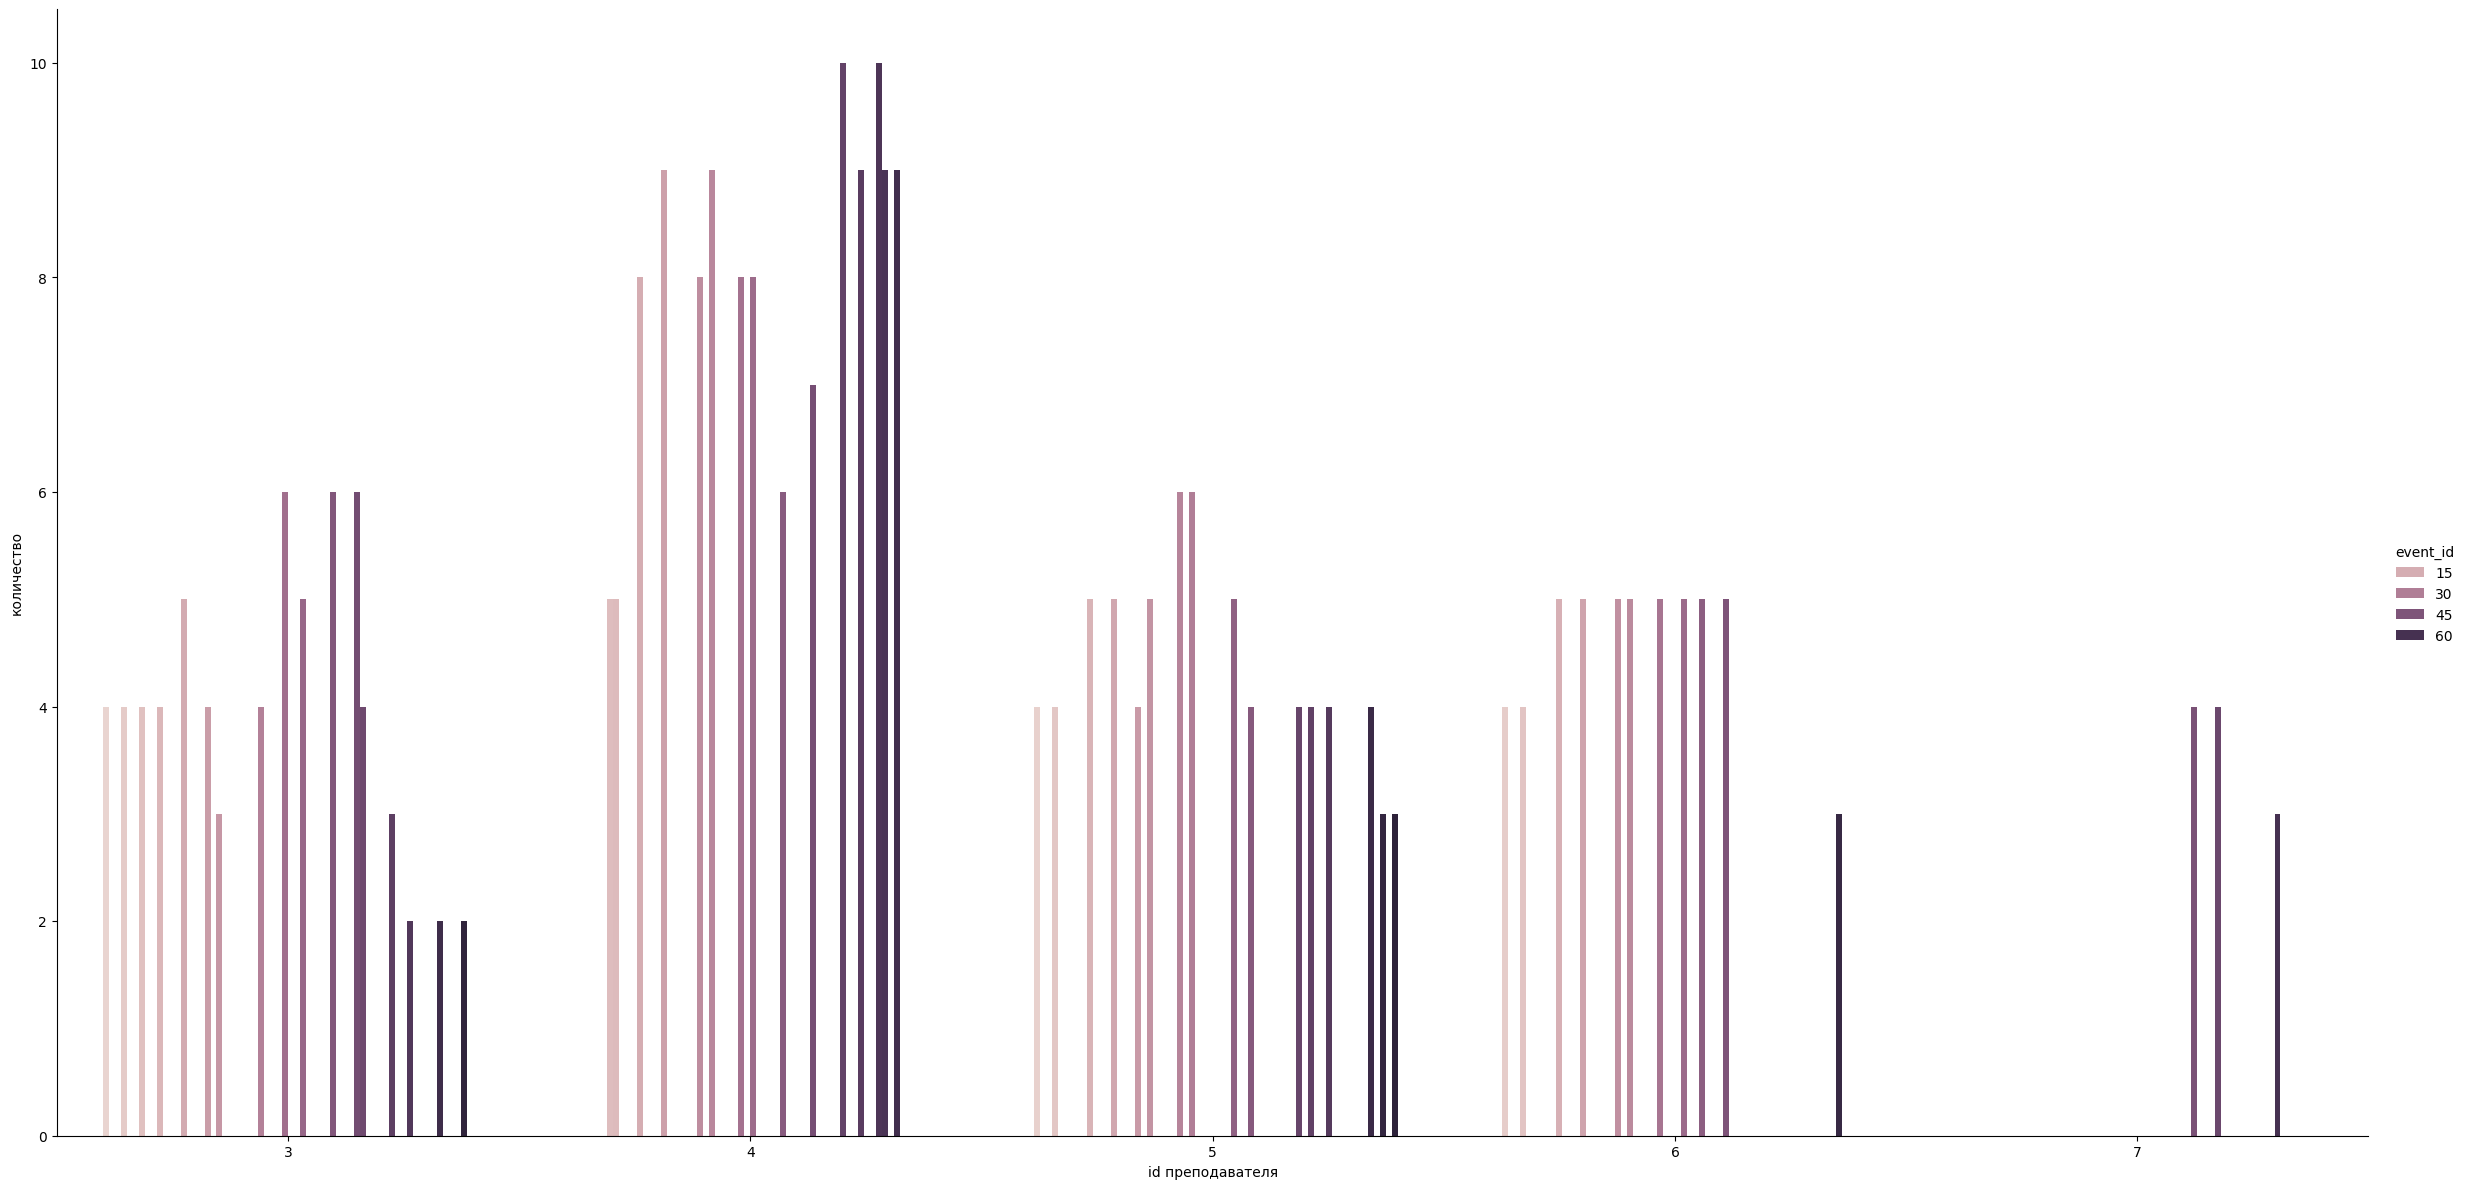

In [22]:
sns.catplot(data=data, x='teacher_ids', hue='event_id', kind='count', height=12, aspect=2)
plt.xlabel('id преподавателя')
plt.ylabel('количество')
plt.show()

<u>__*Вывод:                                                                                       
учитель с id 7 ведёт только 3 урока*__</u>

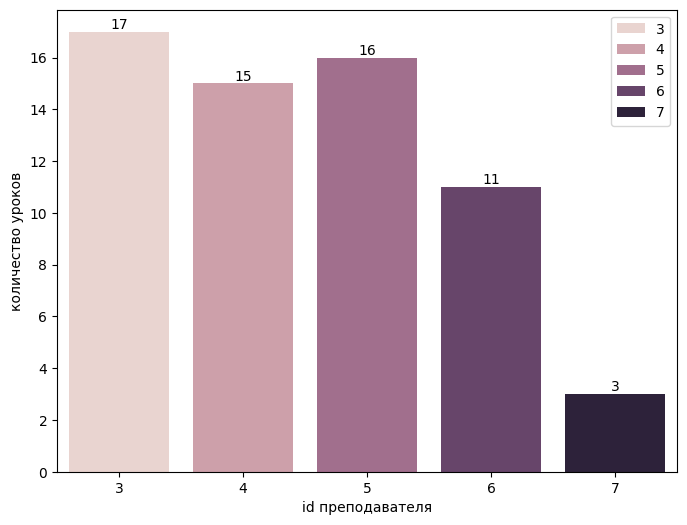

In [23]:
plt.figure(figsize=(8, 6))
list = []
for n in data['teacher_ids'].unique():
    list.append((data[data['teacher_ids'] == n]['event_id'].value_counts().count())) #получаем список: сколько каждый учитель ведёт уроков
ax = sns.barplot(y=list, x=data['teacher_ids'].unique(), hue=data['teacher_ids'].unique(), estimator="sum", errorbar=None)
for k in range(0, 5):
    ax.bar_label(ax.containers[k], fontsize=10)
plt.xlabel('id преподавателя')
plt.ylabel('количество уроков')
plt.show()

<u>__*Вывод:    
учитель с id 3 ведёт 17 уроков, но преподаватель с id 4 имеет бОльшую посещаемость учеников на свои занятия и ведёт на 2 урока меньше (15)*__</u>

### Смотрим какие группы ходят к преподавателям

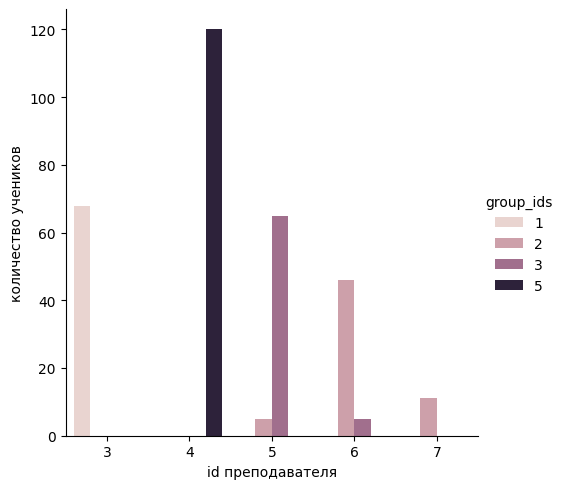

In [24]:
sns.catplot(data=data, x='teacher_ids', hue='group_ids', kind='count') # col='is_attend'
plt.xlabel('id преподавателя')
plt.ylabel('количество учеников')
plt.show()

<u>__*Вывод:                                                                                              
Преподаватель с id 4 ведёт одну самую большую группу с id 5, другие у этой группы не ведут занятия,                                            
преподаватели с id 5 и 6 занимаются с двумя группами.
Группа с id 2 посещает трёх преподавателей*__</u>

### Смотрим % учеников, которые пропускают занятия у преподавателей.

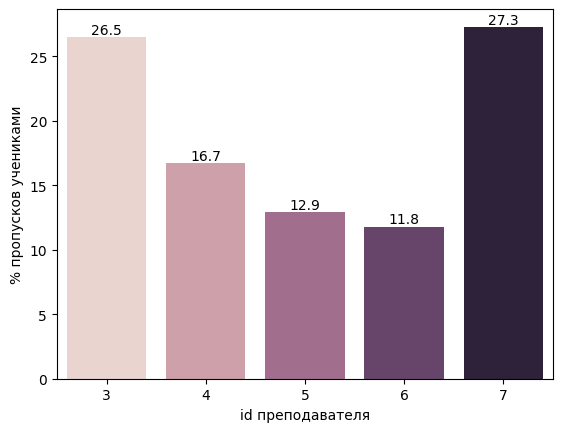

In [25]:
list_percent_miss = []
for i in data['teacher_ids'].unique():   
    list_percent_miss.append((data[(data['teacher_ids'] == i) & (data['is_attend'] ==0)]['group_ids'].count() / data[data['teacher_ids'] == i]['group_ids'].count() * 100).round(1))
ax = sns.barplot(y=list_percent_miss, x=data['teacher_ids'].unique(), hue=data['teacher_ids'].unique(), legend=False)
for k in range(0, 5):
    ax.bar_label(ax.containers[k], fontsize=10)
plt.xlabel('id преподавателя')
plt.ylabel('% пропусков учениками')
plt.show()

<u>__*Вывод:                                                                                              
Преподаватель с id 7 имеет самый большой % непосещаемости,                                            
при этом к нему ходят меньше всего учеников.
ВОЗМОЖНО это связано с предметом, который он преподаёт или с самим преподавателем (например, плохо преподносит материал).*__</u>

### Смотрим Id уроков, которые имеют 0% пропусков.

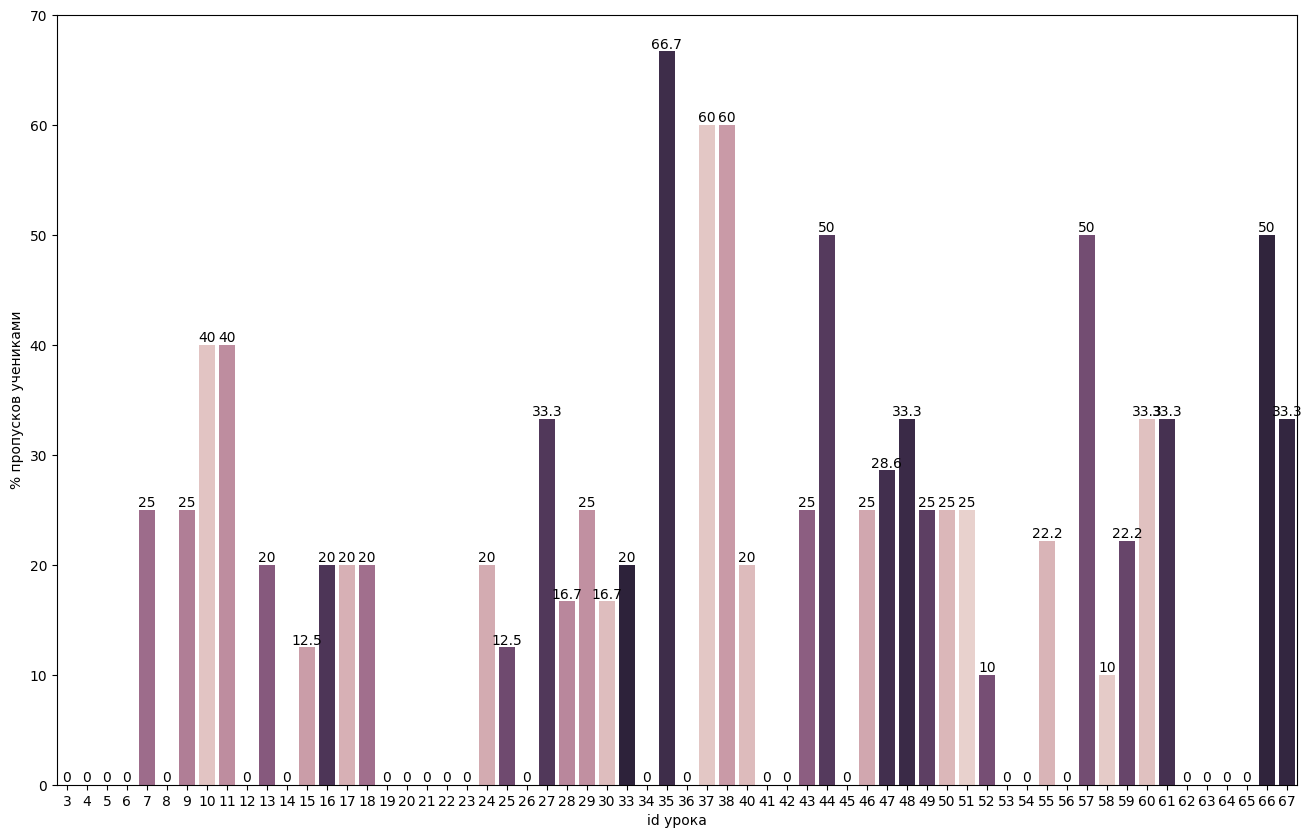

In [26]:
plt.figure(figsize=(16, 10))
list_percent_miss2 = []
for i in sorted(data['event_id'].unique().tolist()):   
    list_percent_miss2.append((data[(data['event_id'] == i) & (data['is_attend'] ==0)]['group_ids'].count() / data[data['event_id'] == i]['group_ids'].count() * 100).round(1))
ax = sns.barplot(y=list_percent_miss2, x=sorted(data['event_id'].unique().tolist()), hue=data['event_id'].unique(), legend=False)
for k in range(0, len(data['event_id'].unique())):
    ax.bar_label(ax.containers[k], fontsize=10)
plt.xlabel('id урока')
plt.ylabel('% пропусков учениками')
plt.show()

<u>__*Вывод:                                                                                              
25 различных id уроков имеют 100% посещаемость.*__</u>

### Смотрим количество проведённых уроков, которые ученики не пропускали. В зависимости от преподавателя.

In [27]:
# Получаем список уроков, по которым 0% пропусков.
list_percent_miss3 = []
for i in sorted(data['event_id'].unique().tolist()):
    list_percent_miss3.append(data[(data['event_id'] == i) & (data['is_attend'] ==0)]['event_id'].count() / data[data['event_id'] == i]['event_id'].count() == 0)   
result = []
for i, flag in enumerate(list_percent_miss3):
    if flag:  # Если значение True
        result.append(sorted(data['event_id'].unique().tolist())[i]) 
print(result) # список id уроков

[3, 4, 5, 6, 8, 12, 14, 19, 20, 21, 22, 23, 26, 34, 36, 41, 42, 45, 53, 54, 56, 62, 63, 64, 65]


In [28]:
# Получаем количество уроков, по которым 0% пропусков, которые ведут преподаватели.
list_p = []
for j in sorted(data['teacher_ids'].unique().tolist()):
    list_p.append(data[data['event_id'].isin(result) & (data['teacher_ids'] == j)]['teacher_ids'].count())

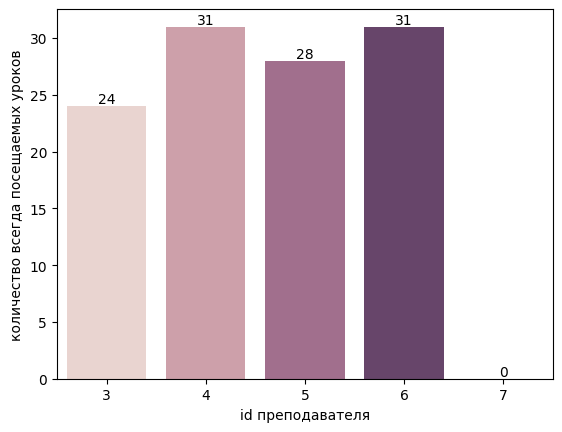

In [29]:
ax = sns.barplot(y=list_p, x=sorted(data['teacher_ids'].unique().tolist()),hue=sorted(data['teacher_ids'].unique().tolist()), legend=False)
for k in range(0, 5):
    ax.bar_label(ax.containers[k], fontsize=10)
plt.xlabel('id преподавателя')
plt.ylabel('количество всегда посещаемых уроков')
plt.show()

<u>__*Вывод:                                                                                              
Преподаватель с id 7 на всех своих уроках имеет как минимум 1 отсутствующего ученика,                                            
У остальных преподавателей % полной посещаемости уроков значительно выше.
Что ещё раз подтверждает ВОЗМОЖНО низкий интерес учеников к предметам, которые ведёт преподаватель с id 7,
или невысокий уровень преподавания данного преподавателя.*__</u>